In [ ]:
#The Python code for generating SMA, MACD, and Bollinger-Band signals

In [ ]:
"Packages to Install"
#Pandas Technical Analysis (Pandas TA) is an easy to use library that leverages the Pandas package
    #with more than 130 Indicators and Utility functions and more than 60 TA Lib Candlestick Patterns.
  "(pip install pandas-ta)"
#yfinance is not affiliated, endorsed, or vetted by Yahoo, Inc. It's an open-source tool that uses Yahoo's publicly available APIs,
    #and is intended for research and educational purposes.
    "(pip install yfinance)"

In [7]:
#1. Import the libraries
import os
import requests
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import pandas as pd
import pandas_datareader.data as web
import pandas_ta as ta
import matplotlib.pyplot as plt
from datetime import date
plt.style.use('fivethirtyeight')
yf.pdr_override()

In [8]:
# Load .env environment variables
load_dotenv('keys.txt')

True

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [10]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [11]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [12]:
# Format current date as ISO format
today = pd.Timestamp("2022-07-14-", tz="America/New_York").isoformat()

In [15]:
# Format current date as ISO format
end = pd.Timestamp("2023-05-04-", tz="America/New_York").isoformat()

In [16]:
# Set the tickers
tickers = ["LCID"]

In [17]:
# Set timeframe to one day ("1Day") for the Alpaca API
timeframe = "1Day"

In [23]:
# Get closing prices for FB and TWTR from the last year
signals_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = end
).df

# Display sample data
signals_df.head(10)

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-07-14 04:00:00+00:00,19.44,20.150,18.960,20.11,12948493,76430,19.729493,LCID
2022-07-15 04:00:00+00:00,20.12,20.290,19.210,19.68,13949546,83028,19.616955,LCID
2022-07-18 04:00:00+00:00,20.07,21.080,19.860,19.96,17273803,112986,20.491635,LCID
2022-07-19 04:00:00+00:00,20.49,20.550,19.860,20.38,11279807,64493,20.377679,LCID
2022-07-20 04:00:00+00:00,20.36,21.340,20.360,21.27,15247737,88505,20.921775,LCID
2022-07-21 04:00:00+00:00,21.14,21.780,20.781,21.48,15841820,99783,21.331948,LCID
2022-07-22 04:00:00+00:00,21.45,21.450,19.540,19.68,13970604,97030,20.213820,LCID
2022-07-25 04:00:00+00:00,19.78,19.900,18.640,18.74,11620236,91405,18.920773,LCID
2022-07-26 04:00:00+00:00,18.48,18.565,17.890,18.09,11087872,80552,18.127983,LCID


In [31]:
data = signals_df

In [32]:
data['SMA 30'] = ta.sma(data['close'],30)
data['SMA 100'] = ta.sma(data['close'],100)
#SMA BUY SELL
#Function for buy and sell signal
def buy_sell(data):
    signalBuy = []
    signalSell = []
    position = False 

    for i in range(len(data)):
        if data['SMA 30'][i] > data['SMA 100'][i]:
            if position == False :
                signalBuy.append(data['close'][i])
                signalSell.append(np.nan)
                position = True
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        elif data['SMA 30'][i] < data['SMA 100'][i]:
            if position == True:
                signalBuy.append(np.nan)
                signalSell.append(data['close'][i])
                position = False
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        else:
            signalBuy.append(np.nan)
            signalSell.append(np.nan)
    return pd.Series([signalBuy, signalSell])


In [33]:
data['Buy_Signal_price'], data['Sell_Signal_price'] = buy_sell(data)
data

,open,high,low,close,volume,trade_count,vwap,symbol,SMA 30,SMA 100,Buy_Signal_price,Sell_Signal_price
timestamp,,,,,,,,,,,,
2022-07-14 04:00:00+00:00,19.440,20.15,18.9600,20.11,12948493,76430,19.729493,LCID,NaN,NaN,NaN,NaN
2022-07-15 04:00:00+00:00,20.120,20.29,19.2100,19.68,13949546,83028,19.616955,LCID,NaN,NaN,NaN,NaN
2022-07-18 04:00:00+00:00,20.070,21.08,19.8600,19.96,17273803,112986,20.491635,LCID,NaN,NaN,NaN,NaN
2022-07-19 04:00:00+00:00,20.490,20.55,19.8600,20.38,11279807,64493,20.377679,LCID,NaN,NaN,NaN,NaN
2022-07-20 04:00:00+00:00,20.360,21.34,20.3600,21.27,15247737,88505,20.921775,LCID,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-28 04:00:00+00:00,7.950,8.07,7.7491,7.94,15597976,73001,7.933660,LCID,7.776667,8.41305,NaN,NaN
2023-05-01 04:00:00+00:00,7.940,7.94,7.2900,7.32,15088113,77741,7.476722,LCID,7.764333,8.39195,NaN,NaN
2023-05-02 04:00:00+00:00,7.360,7.43,7.1000,7.27,13079377,70640,7.221587,LCID,7.750000,8.37815,NaN,NaN


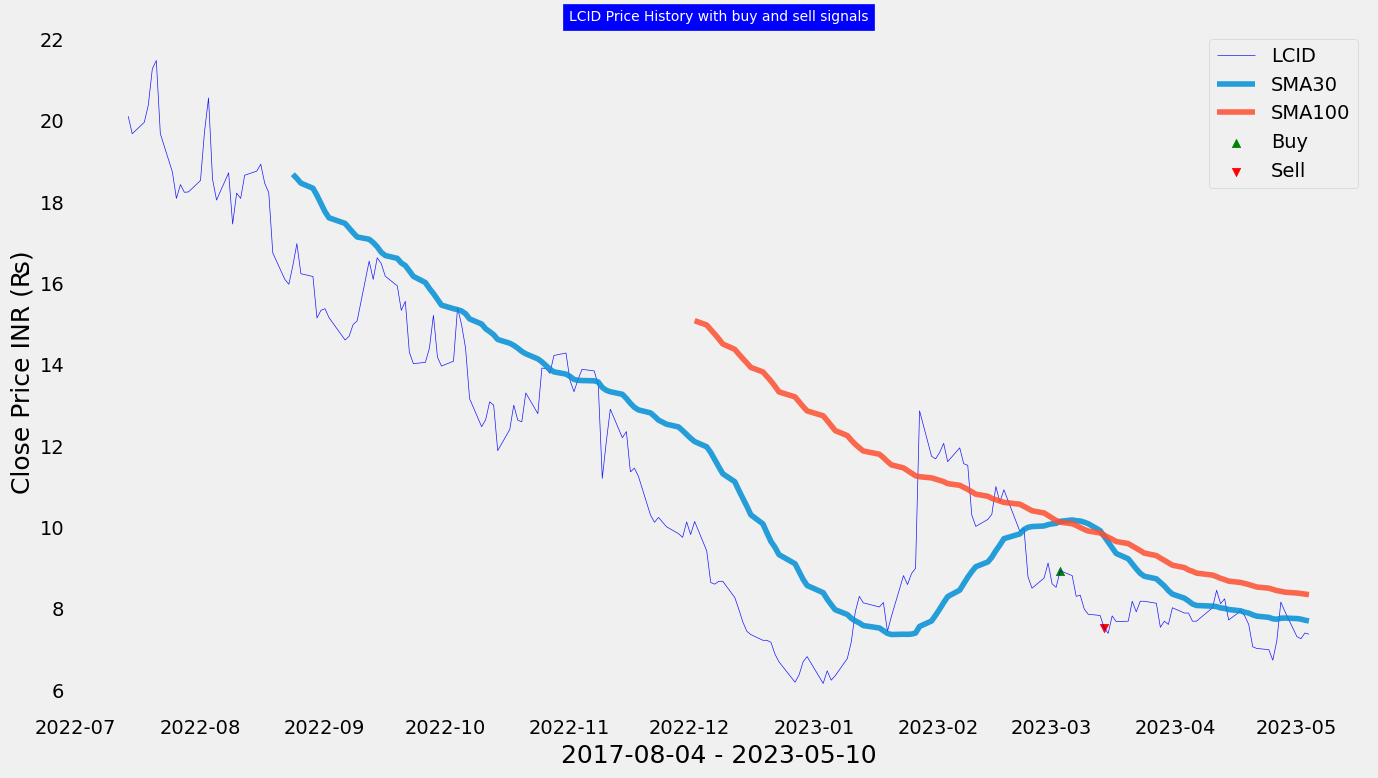

In [35]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(data['close'] , label = stocksymbols[0] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(data['SMA 30'], label = 'SMA30', alpha = 0.85)
ax.plot(data['SMA 100'], label = 'SMA100' , alpha = 0.85)
ax.scatter(data.index , data['Buy_Signal_price'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(data.index , data['Sell_Signal_price'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[0] + " Price History with buy and sell signals",fontsize=10, backgroundcolor='blue', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price INR (₨)' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [37]:
macd = ta.macd(data['close'])
macd

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
timestamp,,,
2022-07-14 04:00:00+00:00,NaN,NaN,NaN
2022-07-15 04:00:00+00:00,NaN,NaN,NaN
2022-07-18 04:00:00+00:00,NaN,NaN,NaN
2022-07-19 04:00:00+00:00,NaN,NaN,NaN
2022-07-20 04:00:00+00:00,NaN,NaN,NaN
...,...,...,...
2023-04-28 04:00:00+00:00,-0.185984,0.052014,-0.237998
2023-05-01 04:00:00+00:00,-0.193313,0.035748,-0.229061
2023-05-02 04:00:00+00:00,-0.200841,0.022576,-0.223417


In [38]:
data = pd.concat([data, macd], axis=1).reindex(data.index)
data

,open,high,low,close,volume,trade_count,vwap,symbol,SMA 30,SMA 100,Buy_Signal_price,Sell_Signal_price,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
timestamp,,,,,,,,,,,,,,,
2022-07-14 04:00:00+00:00,19.440,20.15,18.9600,20.11,12948493,76430,19.729493,LCID,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-15 04:00:00+00:00,20.120,20.29,19.2100,19.68,13949546,83028,19.616955,LCID,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-18 04:00:00+00:00,20.070,21.08,19.8600,19.96,17273803,112986,20.491635,LCID,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-19 04:00:00+00:00,20.490,20.55,19.8600,20.38,11279807,64493,20.377679,LCID,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-20 04:00:00+00:00,20.360,21.34,20.3600,21.27,15247737,88505,20.921775,LCID,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-28 04:00:00+00:00,7.950,8.07,7.7491,7.94,15597976,73001,7.933660,LCID,7.776667,8.41305,NaN,NaN,-0.185984,0.052014,-0.237998
2023-05-01 04:00:00+00:00,7.940,7.94,7.2900,7.32,15088113,77741,7.476722,LCID,7.764333,8.39195,NaN,NaN,-0.193313,0.035748,-0.229061
2023-05-02 04:00:00+00:00,7.360,7.43,7.1000,7.27,13079377,70640,7.221587,LCID,7.750000,8.37815,NaN,NaN,-0.200841,0.022576,-0.223417


In [39]:
def MACD_Strategy(df, risk):
    MACD_Buy=[]
    MACD_Sell=[]
    position=False

    for i in range(0, len(df)):
        if df['MACD_12_26_9'][i] > df['MACDs_12_26_9'][i] :
            MACD_Sell.append(np.nan)
            if position ==False:
                MACD_Buy.append(df['close'][i])
                position=True
            else:
                MACD_Buy.append(np.nan)
        elif df['MACD_12_26_9'][i] < df['MACDs_12_26_9'][i] :
            MACD_Buy.append(np.nan)
            if position == True:
                MACD_Sell.append(df['close'][i])
                position=False
            else:
                MACD_Sell.append(np.nan)
        elif position == True and df['close'][i] < MACD_Buy[-1] * (1 - risk):
            MACD_Sell.append(df["close"][i])
            MACD_Buy.append(np.nan)
            position = False
        elif position == True and df['close'][i] < df['close'][i - 1] * (1 - risk):
            MACD_Sell.append(df["close"][i])
            MACD_Buy.append(np.nan)
            position = False
        else:
            MACD_Buy.append(np.nan)
            MACD_Sell.append(np.nan)

    data['MACD_Buy_Signal_price'] = MACD_Buy
    data['MACD_Sell_Signal_price'] = MACD_Sell

In [40]:
def MACD_Strategy(df, risk):
    MACD_Buy=[]
    MACD_Sell=[]
    position=False

    for i in range(0, len(df)):
        if df['MACD_12_26_9'][i] > df['MACDs_12_26_9'][i] :
            MACD_Sell.append(np.nan)
            if position ==False:
                MACD_Buy.append(df['close'][i])
                position=True
            else:
                MACD_Buy.append(np.nan)
        elif df['MACD_12_26_9'][i] < df['MACDs_12_26_9'][i] :
            MACD_Buy.append(np.nan)
            if position == True:
                MACD_Sell.append(df['close'][i])
                position=False
            else:
                MACD_Sell.append(np.nan)
        elif position == True and df['close'][i] < MACD_Buy[-1] * (1 - risk):
            MACD_Sell.append(df["close"][i])
            MACD_Buy.append(np.nan)
            position = False
        elif position == True and df['close'][i] < df['close'][i - 1] * (1 - risk):
            MACD_Sell.append(df["close"][i])
            MACD_Buy.append(np.nan)
            position = False
        else:
            MACD_Buy.append(np.nan)
            MACD_Sell.append(np.nan)

    data['MACD_Buy_Signal_price'] = MACD_Buy
    data['MACD_Sell_Signal_price'] = MACD_Sell

In [42]:
MACD_strategy = MACD_Strategy(data, 0.025)
data

,open,high,low,close,volume,trade_count,vwap,symbol,SMA 30,SMA 100,Buy_Signal_price,Sell_Signal_price,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MACD_Buy_Signal_price,MACD_Sell_Signal_price
timestamp,,,,,,,,,,,,,,,,,
2022-07-14 04:00:00+00:00,19.440,20.15,18.9600,20.11,12948493,76430,19.729493,LCID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-15 04:00:00+00:00,20.120,20.29,19.2100,19.68,13949546,83028,19.616955,LCID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-18 04:00:00+00:00,20.070,21.08,19.8600,19.96,17273803,112986,20.491635,LCID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-19 04:00:00+00:00,20.490,20.55,19.8600,20.38,11279807,64493,20.377679,LCID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-20 04:00:00+00:00,20.360,21.34,20.3600,21.27,15247737,88505,20.921775,LCID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-28 04:00:00+00:00,7.950,8.07,7.7491,7.94,15597976,73001,7.933660,LCID,7.776667,8.41305,NaN,NaN,-0.185984,0.052014,-0.237998,NaN,NaN
2023-05-01 04:00:00+00:00,7.940,7.94,7.2900,7.32,15088113,77741,7.476722,LCID,7.764333,8.39195,NaN,NaN,-0.193313,0.035748,-0.229061,NaN,NaN
2023-05-02 04:00:00+00:00,7.360,7.43,7.1000,7.27,13079377,70640,7.221587,LCID,7.750000,8.37815,NaN,NaN,-0.200841,0.022576,-0.223417,NaN,NaN


In [43]:
def MACD_color(data):
    MACD_color = []
    for i in range(0, len(data)):
        if data['MACDh_12_26_9'][i] > data['MACDh_12_26_9'][i - 1]:
            MACD_color.append(True)
        else:
            MACD_color.append(False)
    return MACD_color

data['positive'] = MACD_color(data)
data

,open,high,low,close,volume,trade_count,vwap,symbol,SMA 30,SMA 100,Buy_Signal_price,Sell_Signal_price,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MACD_Buy_Signal_price,MACD_Sell_Signal_price,positive
timestamp,,,,,,,,,,,,,,,,,,
2022-07-14 04:00:00+00:00,19.440,20.15,18.9600,20.11,12948493,76430,19.729493,LCID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2022-07-15 04:00:00+00:00,20.120,20.29,19.2100,19.68,13949546,83028,19.616955,LCID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2022-07-18 04:00:00+00:00,20.070,21.08,19.8600,19.96,17273803,112986,20.491635,LCID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2022-07-19 04:00:00+00:00,20.490,20.55,19.8600,20.38,11279807,64493,20.377679,LCID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2022-07-20 04:00:00+00:00,20.360,21.34,20.3600,21.27,15247737,88505,20.921775,LCID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-28 04:00:00+00:00,7.950,8.07,7.7491,7.94,15597976,73001,7.933660,LCID,7.776667,8.41305,NaN,NaN,-0.185984,0.052014,-0.237998,NaN,NaN,True
2023-05-01 04:00:00+00:00,7.940,7.94,7.2900,7.32,15088113,77741,7.476722,LCID,7.764333,8.39195,NaN,NaN,-0.193313,0.035748,-0.229061,NaN,NaN,False
2023-05-02 04:00:00+00:00,7.360,7.43,7.1000,7.27,13079377,70640,7.221587,LCID,7.750000,8.37815,NaN,NaN,-0.200841,0.022576,-0.223417,NaN,NaN,False


C:\Users\nilee\AppData\Local\Temp\ipykernel_24888\2745636202.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((14, 8), (0, 0), rowspan=8, colspan=14)


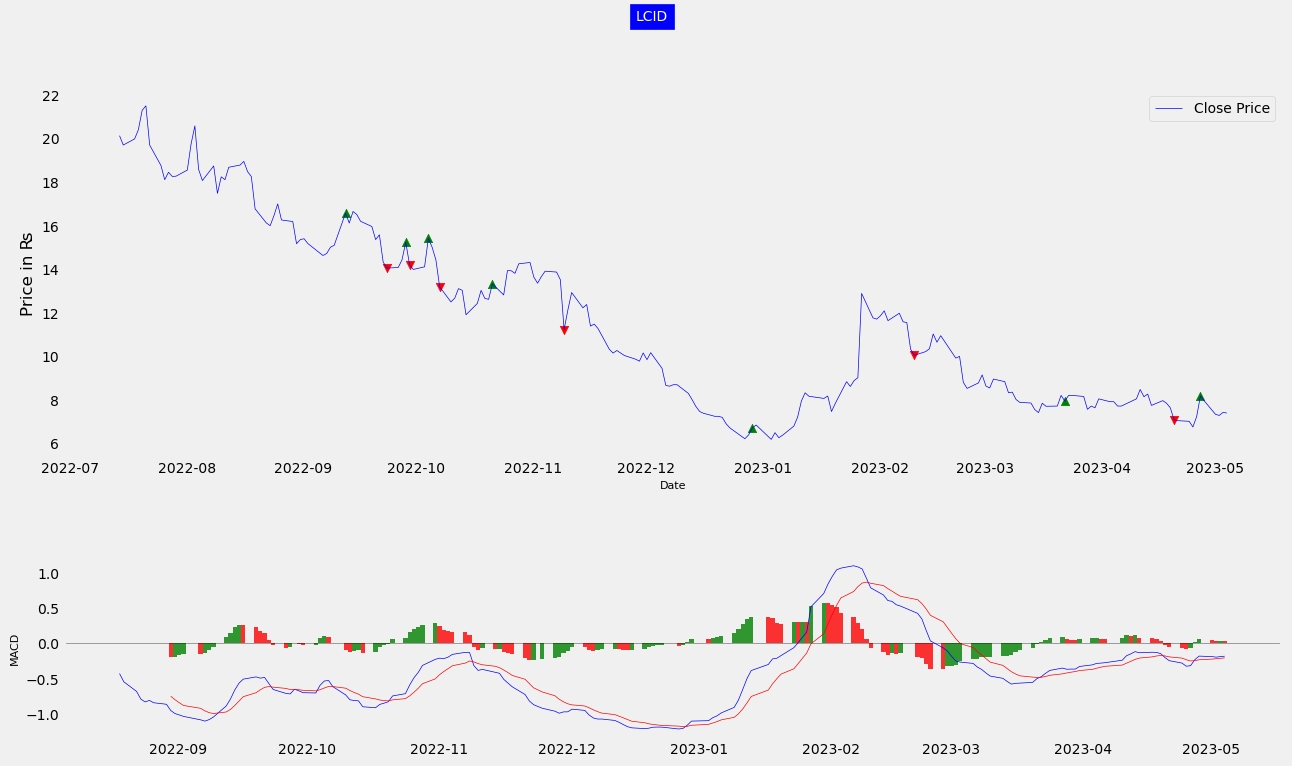

In [44]:
plt.rcParams.update({'font.size': 10})
fig, ax1 = plt.subplots(figsize=(14,8))
fig.suptitle(stocksymbols[0], fontsize=10, backgroundcolor='blue', color='white')
ax1 = plt.subplot2grid((14, 8), (0, 0), rowspan=8, colspan=14)
ax2 = plt.subplot2grid((14, 12), (10, 0), rowspan=6, colspan=14)
ax1.set_ylabel('Price in ₨')
ax1.plot('close',data=data, label='Close Price', linewidth=0.5, color='blue')
ax1.scatter(data.index, data['MACD_Buy_Signal_price'], color='green', marker='^', alpha=1)
ax1.scatter(data.index, data['MACD_Sell_Signal_price'], color='red', marker='v', alpha=1)
ax1.legend()
ax1.grid()
ax1.set_xlabel('Date', fontsize=8)

ax2.set_ylabel('MACD', fontsize=8)
ax2.plot('MACD_12_26_9', data=data, label='MACD', linewidth=0.5, color='blue')
ax2.plot('MACDs_12_26_9', data=data, label='signal', linewidth=0.5, color='red')
ax2.bar(data.index,'MACDh_12_26_9', data=data, label='Volume', color=data.positive.map({True: 'g', False: 'r'}),width=1,alpha=0.8)
ax2.axhline(0, color='black', linewidth=0.5, alpha=0.5)
ax2.grid()
plt.show()

In [45]:
def bb_strategy(data):
    bbBuy = []
    bbSell = []
    position = False
    bb = ta.bbands(data['close'], length=20,std=2)
    data = pd.concat([data, bb], axis=1).reindex(data.index)

    for i in range(len(data)):
        if data['close'][i] < data['BBL_20_2.0'][i]:
            if position == False :
                bbBuy.append(data['close'][i])
                bbSell.append(np.nan)
                position = True
            else:
                bbBuy.append(np.nan)
                bbSell.append(np.nan)
        elif data['close'][i] > data['BBU_20_2.0'][i]:
            if position == True:
                bbBuy.append(np.nan)
                bbSell.append(data['close'][i])
                position = False #To indicate that I actually went there
            else:
                bbBuy.append(np.nan)
                bbSell.append(np.nan)
        else :
            bbBuy.append(np.nan)
            bbSell.append(np.nan)

    data['bb_Buy_Signal_price'] = bbBuy
    data['bb_Sell_Signal_price'] = bbSell

    return data

In [46]:
#storing the function
data = bb_strategy(data)
data

,open,high,low,close,volume,trade_count,vwap,symbol,SMA 30,SMA 100,...,MACD_Buy_Signal_price,MACD_Sell_Signal_price,positive,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,bb_Buy_Signal_price,bb_Sell_Signal_price
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-07-14 04:00:00+00:00,19.440,20.15,18.9600,20.11,12948493,76430,19.729493,LCID,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-15 04:00:00+00:00,20.120,20.29,19.2100,19.68,13949546,83028,19.616955,LCID,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-18 04:00:00+00:00,20.070,21.08,19.8600,19.96,17273803,112986,20.491635,LCID,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-19 04:00:00+00:00,20.490,20.55,19.8600,20.38,11279807,64493,20.377679,LCID,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-20 04:00:00+00:00,20.360,21.34,20.3600,21.27,15247737,88505,20.921775,LCID,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-28 04:00:00+00:00,7.950,8.07,7.7491,7.94,15597976,73001,7.933660,LCID,7.776667,8.41305,...,NaN,NaN,True,6.802634,7.7200,8.637366,23.765953,0.619909,NaN,NaN
2023-05-01 04:00:00+00:00,7.940,7.94,7.2900,7.32,15088113,77741,7.476722,LCID,7.764333,8.39195,...,NaN,NaN,False,6.762926,7.6845,8.606074,23.985274,0.302241,NaN,NaN
2023-05-02 04:00:00+00:00,7.360,7.43,7.1000,7.27,13079377,70640,7.221587,LCID,7.750000,8.37815,...,NaN,NaN,False,6.720046,7.6530,8.585954,24.381405,0.294738,NaN,NaN


C:\Users\nilee\AppData\Local\Temp\ipykernel_24888\3545936979.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((14, 8), (0, 0), rowspan=8, colspan=14)


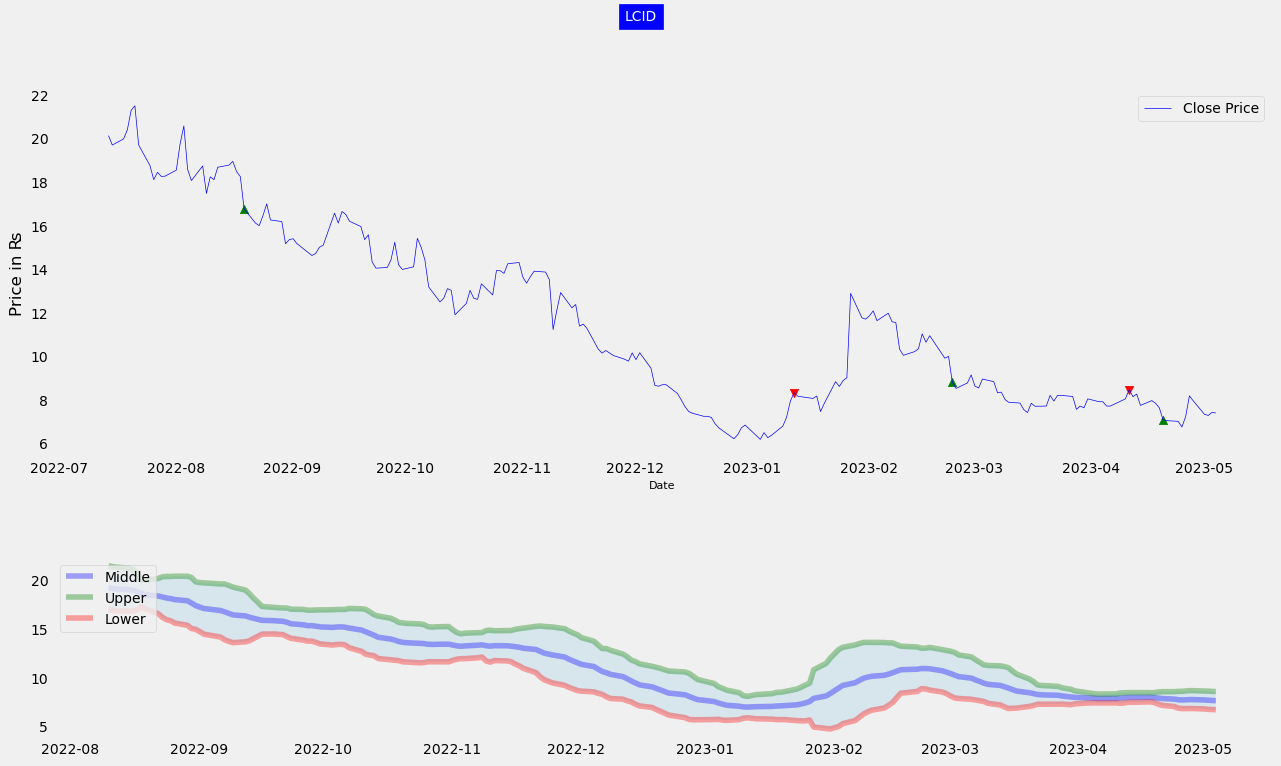

In [47]:
#plot
fig, ax1 = plt.subplots(figsize=(14,8))
fig.suptitle(stocksymbols[0], fontsize=10, backgroundcolor='blue', color='white')
ax1 = plt.subplot2grid((14, 8), (0, 0), rowspan=8, colspan=14)
ax2 = plt.subplot2grid((14, 12), (10, 0), rowspan=6, colspan=14)
ax1.set_ylabel('Price in ₨')
ax1.plot(data['close'],label='Close Price', linewidth=0.5, color='blue')
ax1.scatter(data.index, data['bb_Buy_Signal_price'], color='green', marker='^', alpha=1)
ax1.scatter(data.index, data['bb_Sell_Signal_price'], color='red', marker='v', alpha=1)
ax1.legend()
ax1.grid()
ax1.set_xlabel('Date', fontsize=8)

ax2.plot(data['BBM_20_2.0'], label='Middle', color='blue', alpha=0.35) #middle band
ax2.plot(data['BBU_20_2.0'], label='Upper', color='green', alpha=0.35) #Upper band
ax2.plot(data['BBL_20_2.0'], label='Lower', color='red', alpha=0.35) #lower band
ax2.fill_between(data.index, data['BBL_20_2.0'], data['BBU_20_2.0'], alpha=0.1)
ax2.legend(loc='upper left')
ax2.grid()
plt.show()